# Twitter sentiment vs BTC USD 

## Import Dependencies

In [17]:
%matplotlib notebook

In [18]:
from config import (consumer_key, consumer_secret, access_token, access_token_secret)

In [19]:
import  matplotlib.pyplot  as plt
import pandas as pd
import numpy as np
import tweepy
import json
import datetime
import time
import pprint as pprint
import requests
import json
import sklearn.preprocessing as skl


from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

## Using mini-api for cryptocurrency for price changes

In [20]:
url = "https://min-api.cryptocompare.com/data/histominute?fsym=BTC&tsym=GBP&limit=95"
response = requests.get(url)
print(response.url)

https://min-api.cryptocompare.com/data/histominute?fsym=BTC&tsym=GBP&limit=95


## Create Twitter Authorization

In [21]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

## Create module to run for twitter sentiments

In [39]:
def twitter_search():
    
    public_tweets = api.search('BTCUSD', count=96, result_type="recent")
        
        # Loop through all tweets
    for tweet in public_tweets['statuses']:
    
           # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
    
            # Add each value to the appropriate list
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        
        tweet_id.append(tweet['created_at'])
        sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "ID":tweet_id,
                           "Text": tweet['text'],
                           })
            
        time = tweet['created_at']
        convert_time(time)
            
    #plt.plot(np.arange(len(compound_list)), compound_list)
    #plt.title(f"Sentiment Analysis of Tweets")
    #plt.ylabel("Tweet Polarity")
    #plt.xlabel("Time stamp")
    #plt.xticks(rotation = 'vertical')
    #plt.tight_layout()
    #plt.savefig('../Output/Sentiment_Analysis')

## Create Module to convert time stamp

In [36]:
def convert_time (time):
    time = datetime.datetime.strptime(time, "%a %b %d %H:%M:%S %z %Y").timestamp()
    time = datetime.datetime.fromtimestamp(time).strftime('%Y-%m-%d %H:%M:%S')
    time_stamp.append(time)

## Create module for recent 7 day price change

In [37]:
def refresh_price():
    Timestamp = []
    Close = []
    converted_time = []
    #extract timestamp and USD price from json
    data = response.json()
    #pprint(data)
    for x in data['Data']:
        Timestamp.append(x['time'])
        Close.append(x['close'])
    
    #create data frame from file and then add a converted timestamp column to df
    for each in Timestamp:
        converted_time.append(str(each))
        
    price_by_minute = [('Timestamp', Timestamp),('Close',Close), ('Converted Time',converted_time)]
    btc_prices = pd.DataFrame.from_items(price_by_minute)
    btc_prices['Converted Time'] = pd.to_datetime(btc_prices['Timestamp'], unit = 's')
    btc_prices.set_index(['Converted Time'], inplace = True)
    
    #normalize prices
    btc_norm = skl.normalize(btc_prices['Close'].values.reshape(-1,1), axis = 0, norm = 'l1')

    #create plot
    plt.plot(np.arange(len(compound_list)), btc_norm)
    plt.plot(np.arange(len(compound_list)), compound_list)
    plt.xlabel('Date')
    plt.ylabel('USD')
    plt.xticks(rotation = 'vertical')
    plt.tight_layout()
    plt.show()
    plt.savefig('../Output/btc_mostrecentSeven.png')

C:\Users\MaryLin\Anaconda3\envs\PythonNoob\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.


<IPython.core.display.Javascript object>


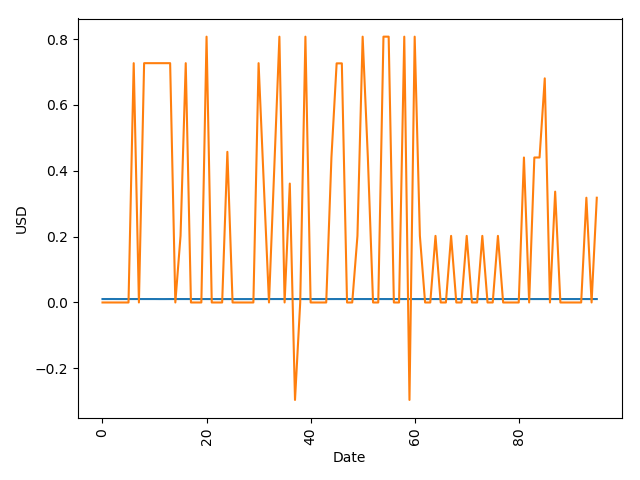

In [40]:
compound_list = []
positive_list = []
neutral_list = []
negative_list = []
sentiments = []
time_stamp = []
tweet_id = []
oldest = ''
    
twitter_search(oldest)
refresh_price()

In [33]:
sentiments_pd = pd.DataFrame(sentiments)
sentiments_pd.set_index(['Date'], inplace = True)
sentiments_pd

,Compound,ID,Text
Date,,,
Mon Jul 16 20:12:41 +0000 2018,0.0000,1018951575639875585,RT @TheCryptoDog: Things looking UP. Going to ...
Mon Jul 16 20:12:21 +0000 2018,0.0000,1018951490680033280,RT @RafKadian: BITCOIN 6630 : Break of 6800 op...
Mon Jul 16 20:12:07 +0000 2018,0.0000,1018951433763328001,RT @crypto_rand: Weekly $BTCUSD - $BTC chart:\...
Mon Jul 16 20:10:21 +0000 2018,0.0000,1018950989607362560,RT @crypto_rand: Weekly $BTCUSD - $BTC chart:\...
Mon Jul 16 20:10:00 +0000 2018,0.0000,1018950899899568128,#BTCUSD - continuacao - https://t.co/oPBiwVzOqU
Mon Jul 16 20:07:52 +0000 2018,0.0000,1018950365222526977,RT @AlpariRA: Mercado Diário: Acompanhe a brev...
Mon Jul 16 20:07:41 +0000 2018,0.7269,1018950315587063808,RT @Latifayhan2: A nice free Can you register...
Mon Jul 16 20:07:37 +0000 2018,0.0000,1018950300164648962,Mercado Diário: Acompanhe a breve análise diár...
Mon Jul 16 20:07:30 +0000 2018,0.7269,1018950273316868097,RT @Latifayhan2: A nice free Can you register...


In [15]:
btc_prices

NameError: name 'btc_prices' is not defined